In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime


Bad key "text.kerning_factor" on line 4 in
C:\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('step2-output.csv')

In [5]:
df.shape

(219521, 53)

In [6]:
df.head()

date  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0  2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1  2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2  2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
3  2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
4  2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  sensor_44  \
0   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
1   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
2   73.54598   13.32465   16.03733   15.61777  ...   41.66666  39.351852   
3   76.98898   13.31742   16.24711   15.69734  ...   40.88541  39.062500   
4   76.58897   13.35359   16.21094   15.69734  ...   41.40625  38.773150   

   sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
0   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
1   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
2   65.39352   51.21528  38.194443   155.9606   67.12963   241.3194   
3   64.81481   51.21528  38.194440   155.9606   66.84028   240.4514   
4   65.10416   51.79398  38.773150   158.2755   66.55093   242.1875   

   sensor_51  machine_status  
0   201.3889          NORMAL  
1   201.3889          NORMAL  
2   203.7037          NORMAL  
3   203.1250          NORMAL  
4   201.3889          NORMAL  

[5 rows x 53 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219521 entries, 0 to 219520
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            219521 non-null  object 
 1   sensor_00       219521 non-null  float64
 2   sensor_01       219521 non-null  float64
 3   sensor_02       219521 non-null  float64
 4   sensor_03       219521 non-null  float64
 5   sensor_04       219521 non-null  float64
 6   sensor_05       219521 non-null  float64
 7   sensor_06       219521 non-null  float64
 8   sensor_07       219521 non-null  float64
 9   sensor_08       219521 non-null  float64
 10  sensor_09       219521 non-null  float64
 11  sensor_10       219521 non-null  float64
 12  sensor_11       219521 non-null  float64
 13  sensor_12       219521 non-null  float64
 14  sensor_13       219521 non-null  float64
 15  sensor_14       219521 non-null  float64
 16  sensor_16       219521 non-null  float64
 17  sensor_17 

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.set_index('date', inplace=True)

In [11]:
df.describe().T

count        mean         std        min         25%  \
sensor_00  219521.0    2.371961    0.403223   0.000000    2.417187   
sensor_01  219521.0   47.590015    3.299447   0.000000   46.310760   
sensor_02  219521.0   50.863387    3.668355  33.159720   50.390620   
sensor_03  219521.0   43.746718    2.417856  31.640620   42.838539   
sensor_04  219521.0  590.629672  144.127709   2.798032  626.620400   
sensor_05  219521.0   73.397642   17.304487   0.000000   69.982320   
sensor_06  219521.0   13.500351    2.143252   0.014468   13.346350   
sensor_07  219521.0   15.841237    2.176726   0.000000   15.856480   
sensor_08  219521.0   15.198273    2.015901   0.028935   15.183740   
sensor_09  219521.0   14.796988    2.072470   0.000000   15.010130   
sensor_10  219521.0   41.461726   12.102394   0.000000   40.700760   
sensor_11  219521.0   41.908190   13.066915   0.000000   38.842180   
sensor_12  219521.0   29.133358   10.118714   0.000000   28.680340   
sensor_13  219521.0    7.080832    6.906261   0.000000    1.536424   
sensor_14  219521.0  377.224967  112.717758  32.409550  418.128300   
sensor_16  219521.0  416.897999  125.454450   0.000000  459.487300   
sensor_17  219521.0  421.565602  128.519412   0.000000  454.184700   
sensor_18  219521.0    2.306220    0.762721   0.000000    2.448115   
sensor_19  219521.0  591.498440  198.441299   0.000000  662.795500   
sensor_20  219521.0  361.143866  101.519113   0.000000  398.035600   
sensor_21  219521.0  796.963480  225.726772  95.527660  875.497700   
sensor_22  219521.0  460.250858  153.894024   0.000000  479.043700   
sensor_23  219521.0  923.474036  290.704608   0.000000  950.972400   
sensor_24  219521.0  556.851052  181.458419   0.000000  601.182100   
sensor_25  219521.0  649.766530  220.084270   0.000000  694.086100   
sensor_26  219521.0  787.013592  245.756447  43.154790  791.955000   
sensor_27  219521.0  499.945115  162.443507   0.000000  448.248300   
sensor_28  219521.0  852.418041  312.275671   4.319347  783.033600   
sensor_29  219521.0  576.815388  225.356514   0.636574  519.112000   
sensor_30  219521.0  614.688802  195.652698   0.000000  627.777800   
sensor_31  219521.0  864.121286  282.849223  23.958330  839.583300   
sensor_32  219521.0  804.927785  259.841094   0.240716  761.666600   
sensor_33  219521.0  486.843044  150.266418   6.460602  489.847300   
sensor_34  219521.0  235.066491   88.181545  54.882370  172.566100   
sensor_35  219521.0  427.471956  141.461187   0.000000  353.394300   
sensor_36  219521.0  593.529842  289.080921   2.260970  289.071700   
sensor_37  219521.0   60.728412   37.596595   0.000000   28.717770   
sensor_38  219521.0   49.645540   10.551226  24.479166   45.572910   
sensor_39  219521.0   36.604566   15.638946  19.270830   32.552080   
sensor_40  219521.0   68.858892   21.398408  23.437500   57.812500   
sensor_41  219521.0   35.356642    7.908832  20.833330   32.552080   
sensor_42  219521.0   35.445976   10.275169  22.135416   32.812500   
sensor_43  219521.0   43.878502   11.061115  24.479166   39.583330   
sensor_44  219521.0   42.650970   11.592033  25.752316   36.747684   
sensor_45  219521.0   43.085801   12.852025  26.331018   36.747684   
sensor_46  219521.0   48.012455   15.657217  26.331018   40.509258   
sensor_47  219521.0   44.327382   10.448843  27.199070   39.062500   
sensor_48  219521.0  150.901538   82.332042  26.331018   83.622690   
sensor_49  219521.0   57.121069   19.170952  26.620370   47.743060   
sensor_50  219521.0  183.016279   52.671229  27.488426  182.581000   
sensor_51  219521.0  202.719224  105.868122  27.777779  180.555600   

                  50%          75%          max  
sensor_00    2.455556     2.499826     2.549016  
sensor_01   48.133678    49.479160    56.727430  
sensor_02   51.649300    52.777770    56.032990  
sensor_03   44.227428    45.225693    48.220490  
sensor_04  632.754600   637.615723   800.000000  
sensor_05   75.578420    80.918750    99.999880  
sensor_06   13.628470  

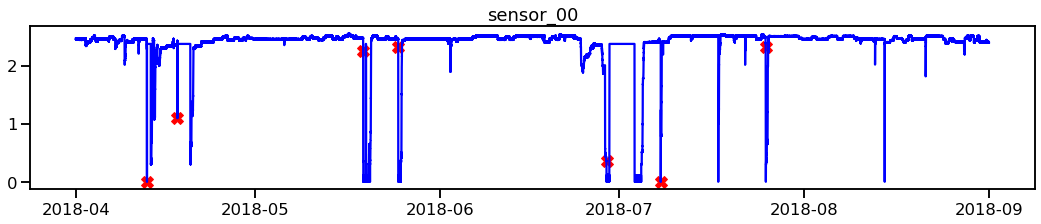

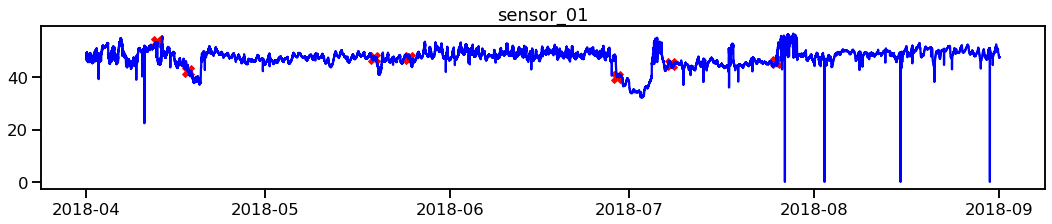

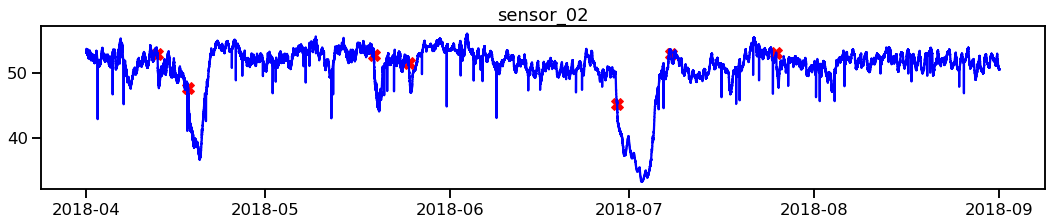

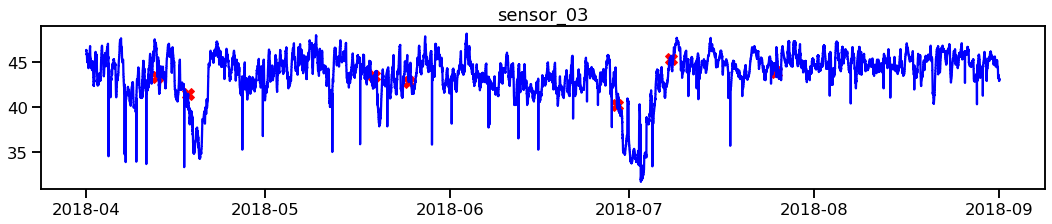

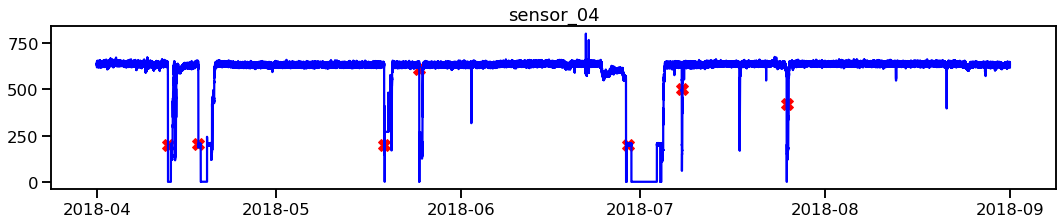

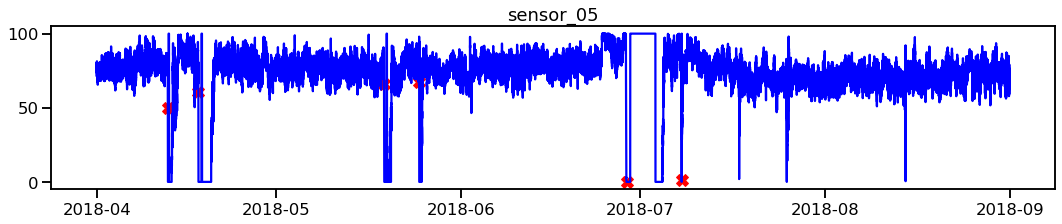

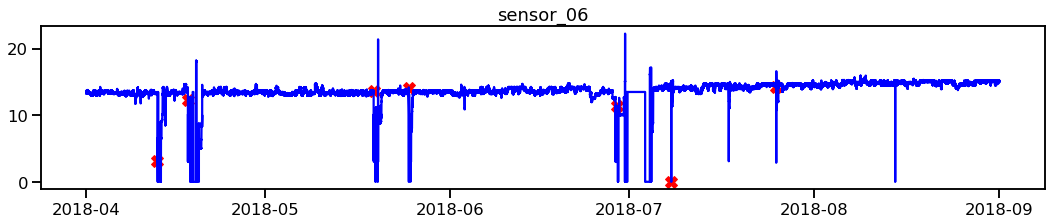

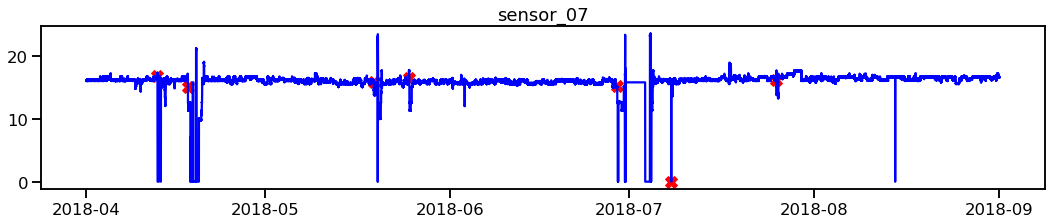

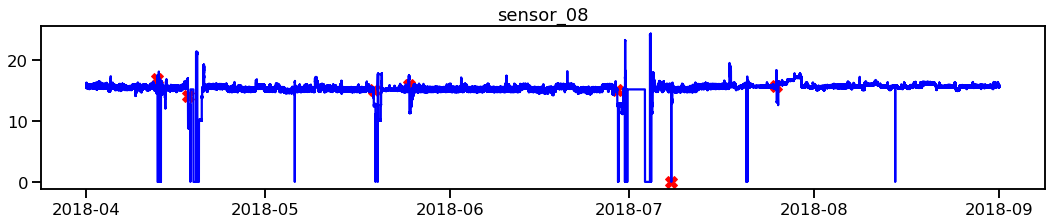

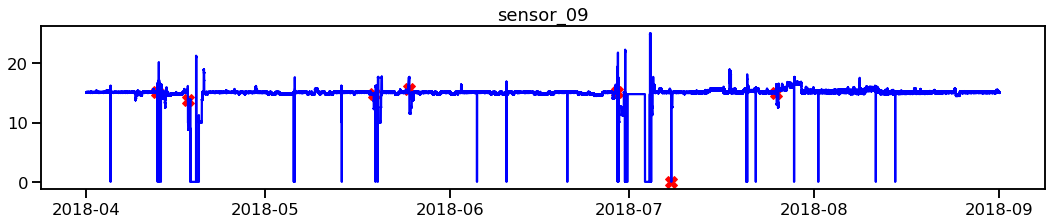

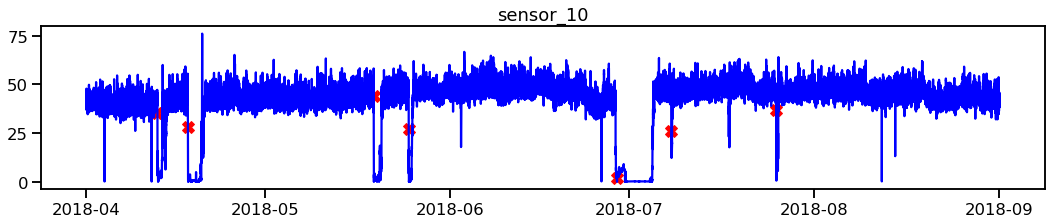

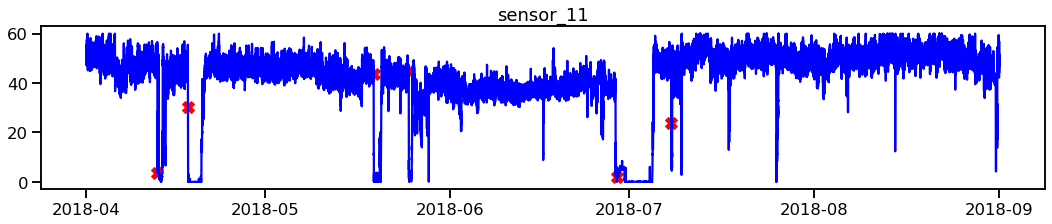

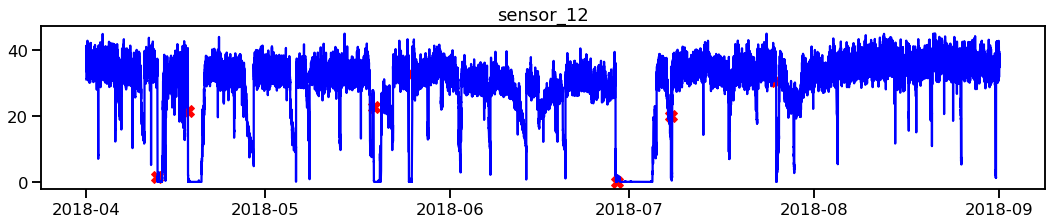

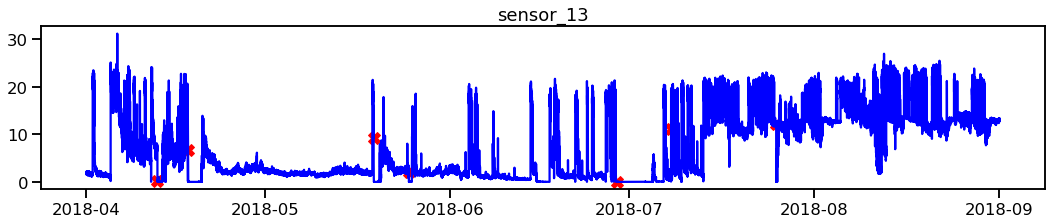

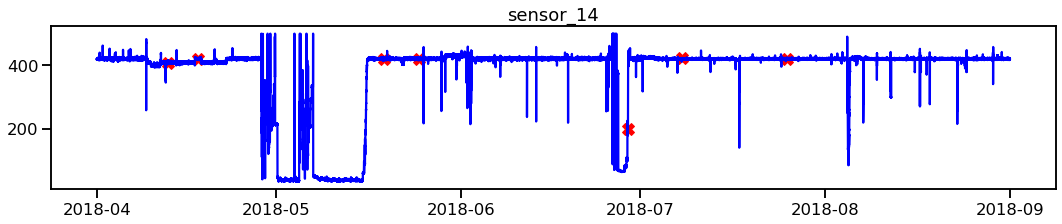

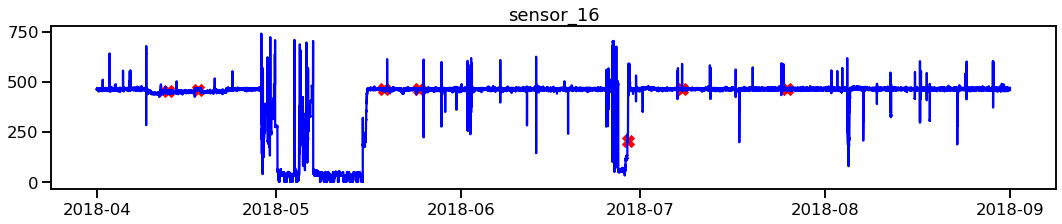

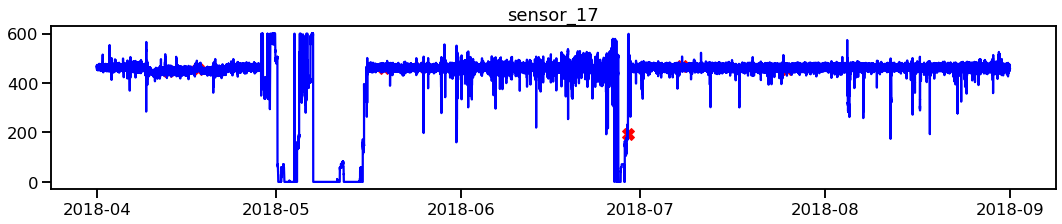

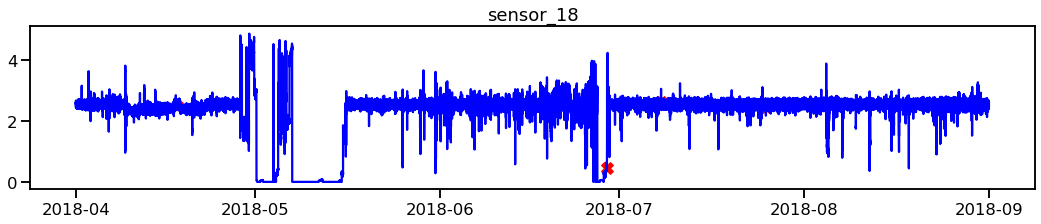

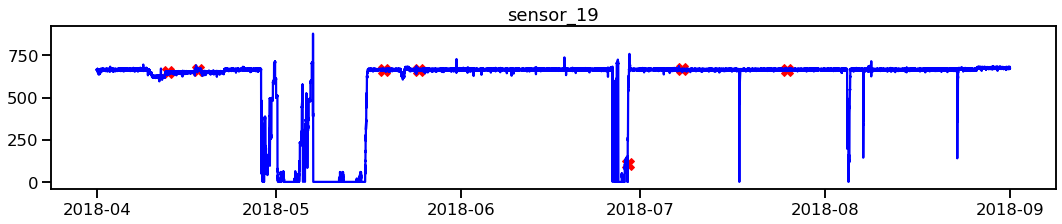

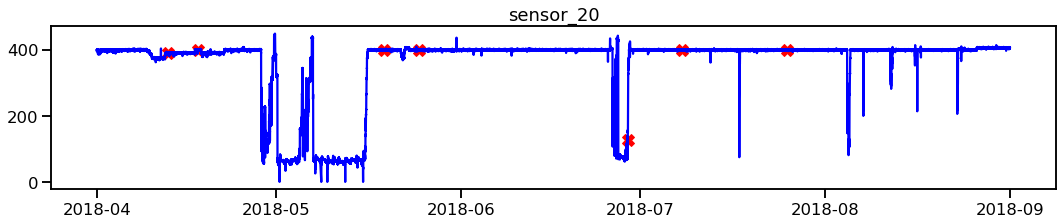

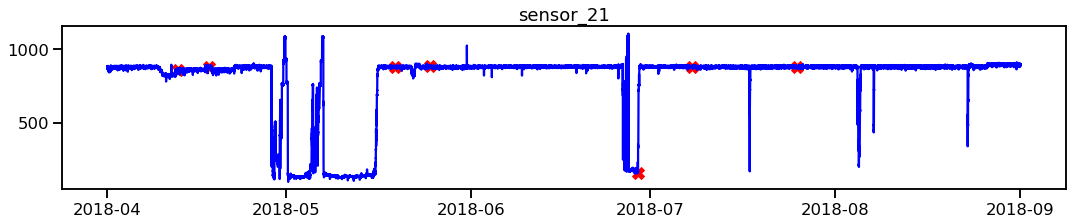

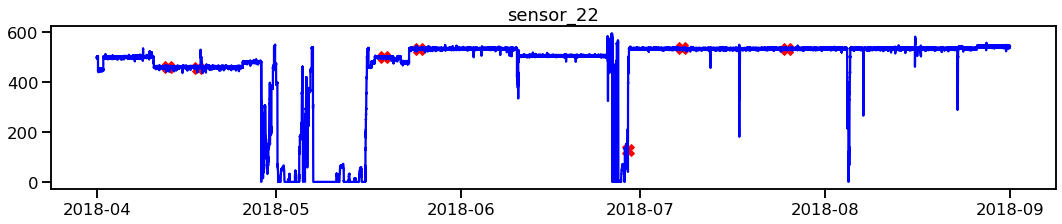

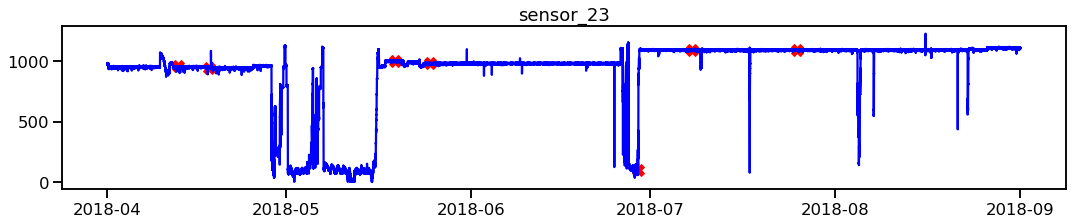

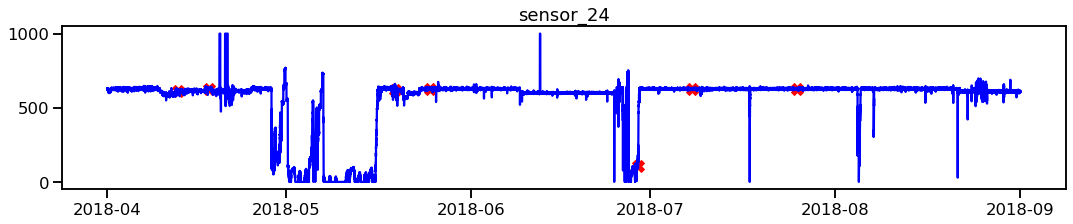

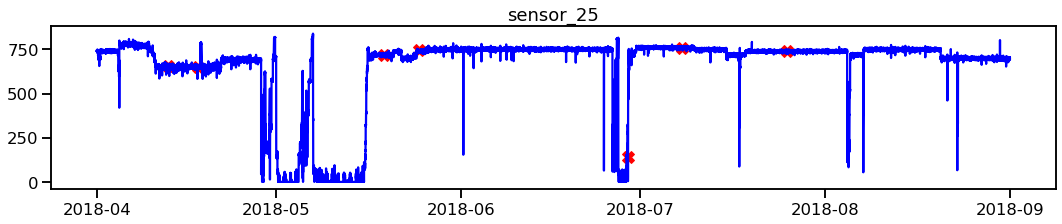

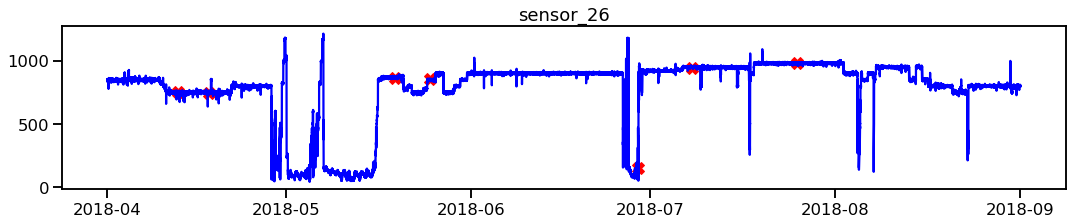

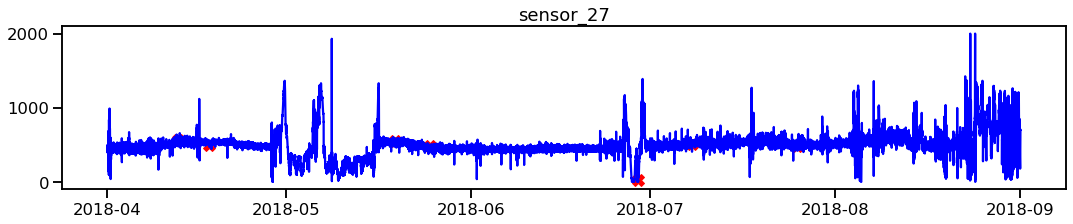

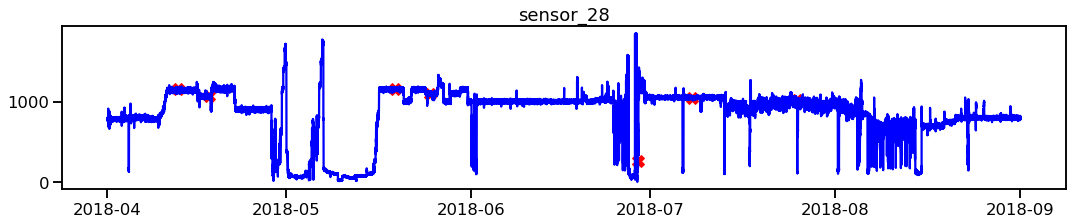

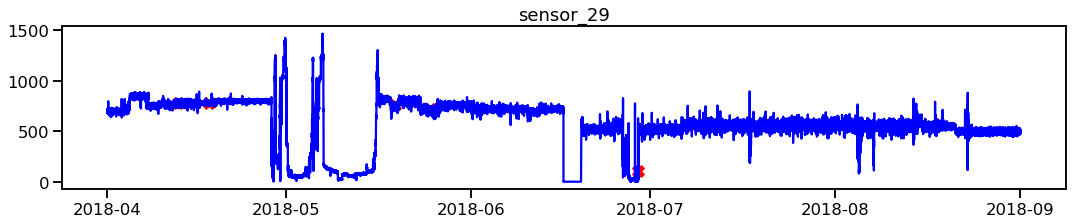

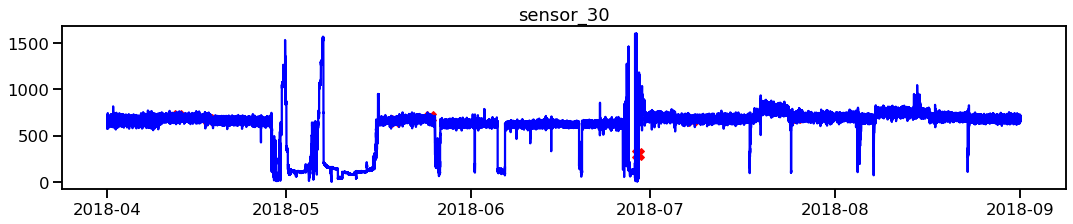

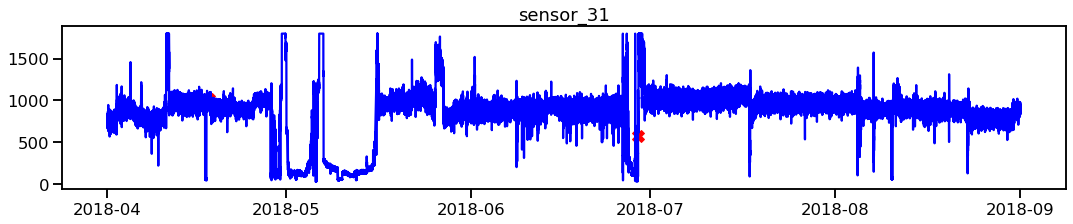

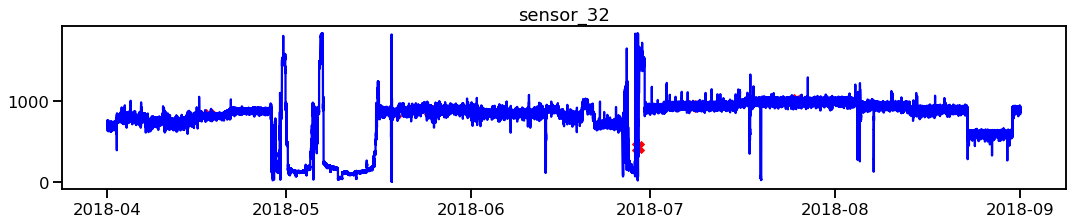

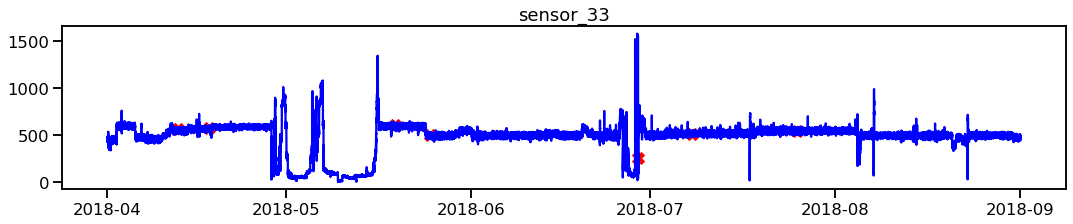

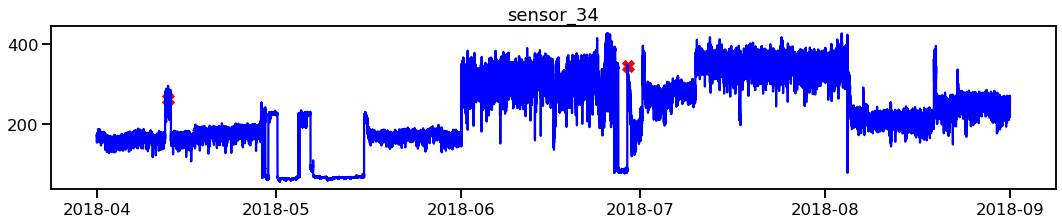

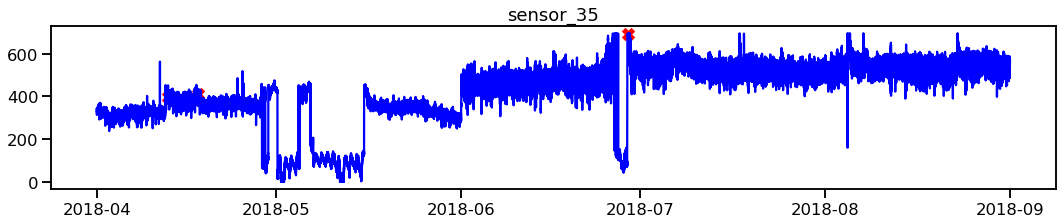

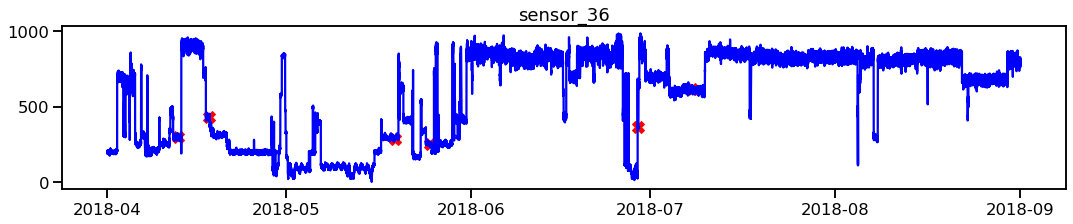

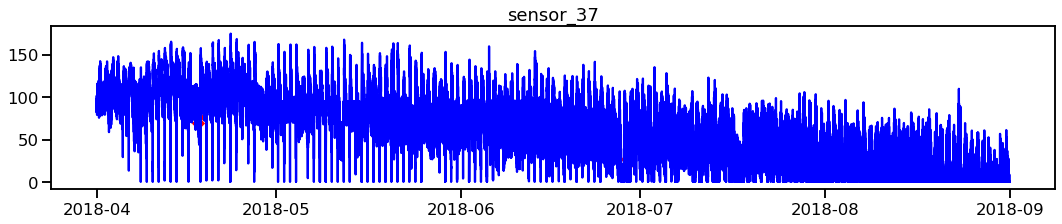

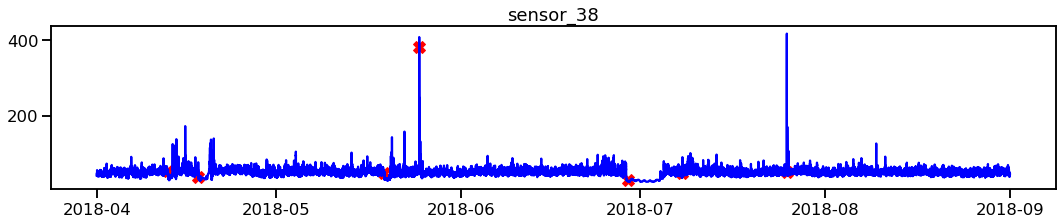

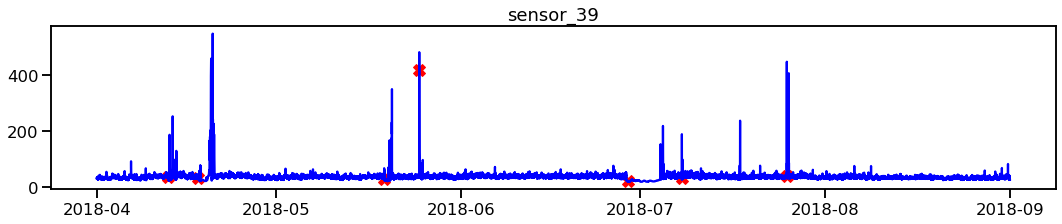

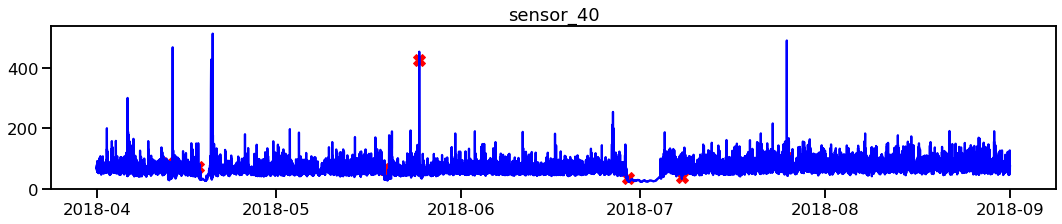

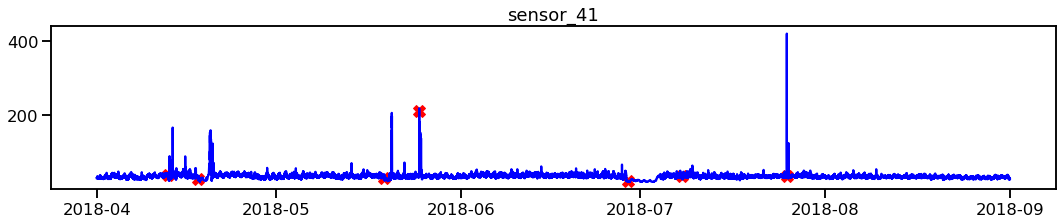

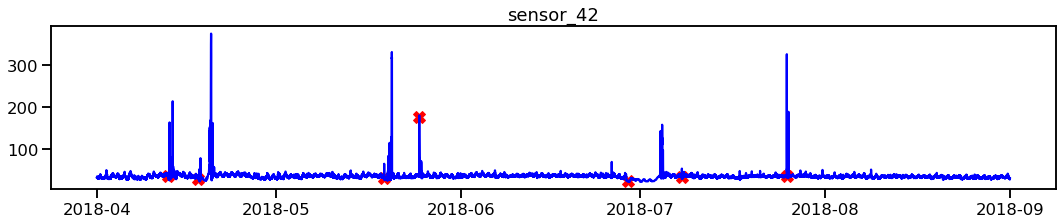

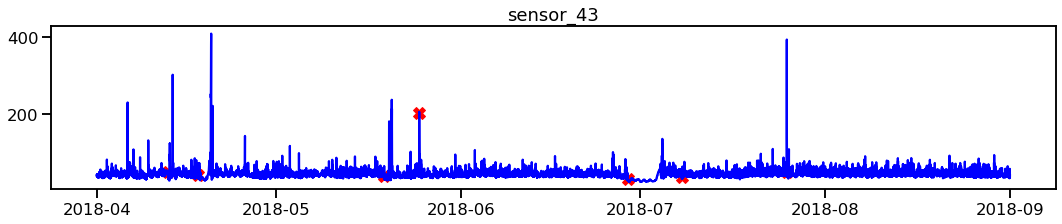

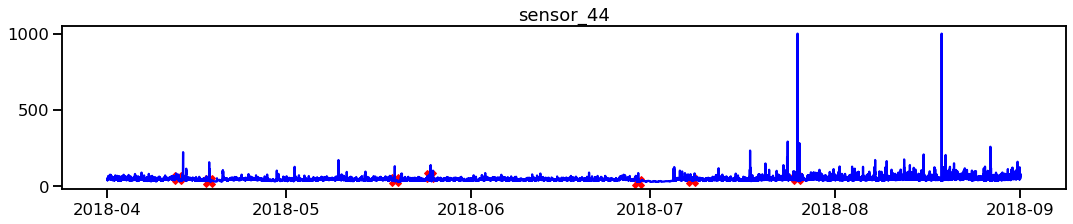

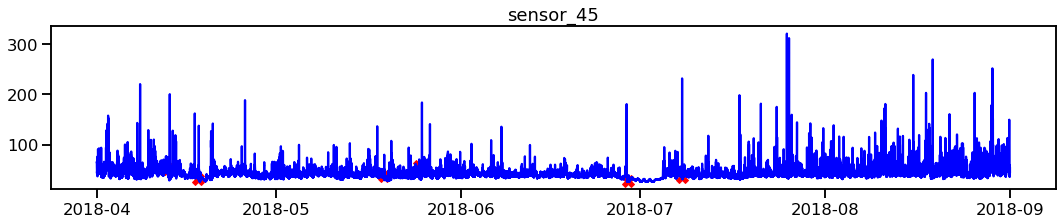

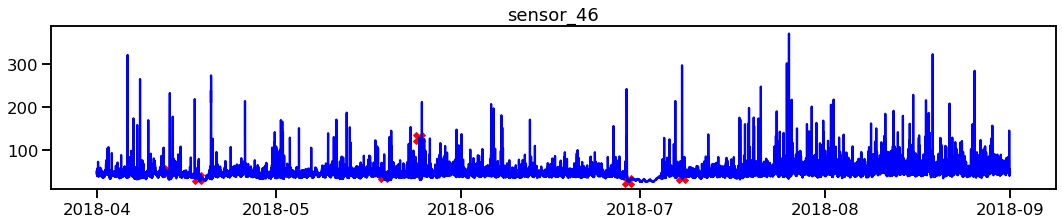

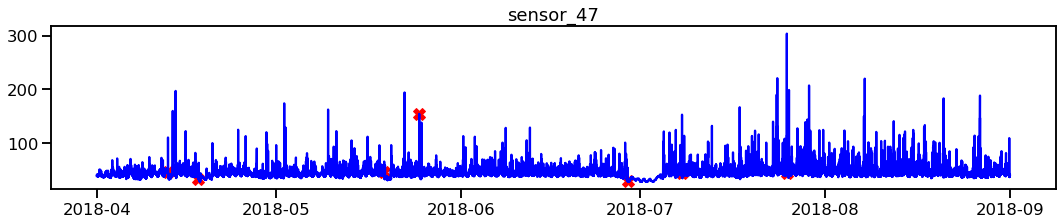

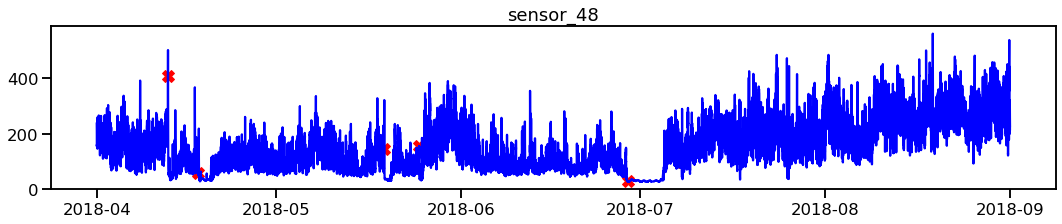

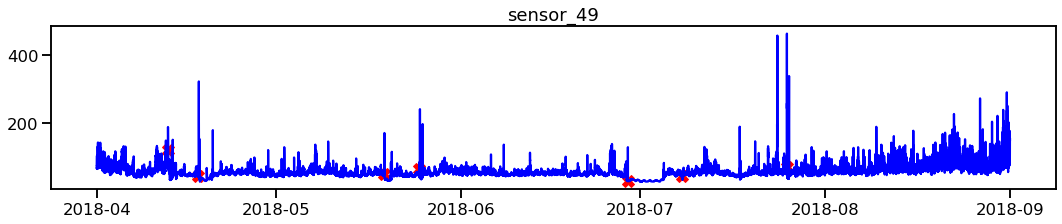

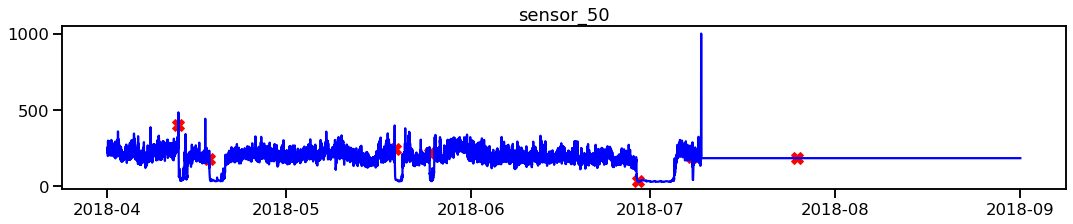

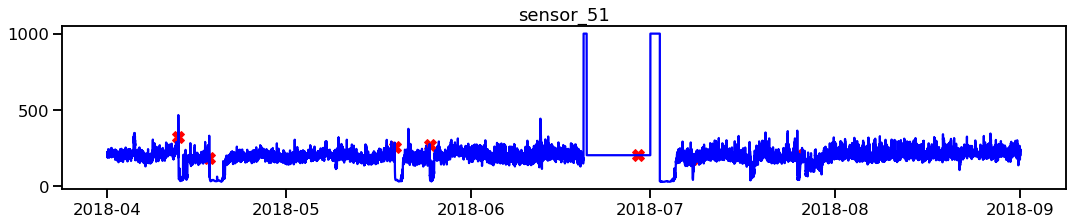

In [12]:
broken = df[df['machine_status']=='BROKEN']
# Extract the names of the numerical columns
df2 = df.drop(['machine_status'], axis=1)
names=df2.columns
# Plot time series for each sensor with BROKEN state marked with X in red color
for name in names:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df[name], color='blue')
    _ = plt.title(name)
    plt.show()

In [13]:
rollmean = df.resample(rule='D').mean()
rollstd = df.resample(rule='D').std()

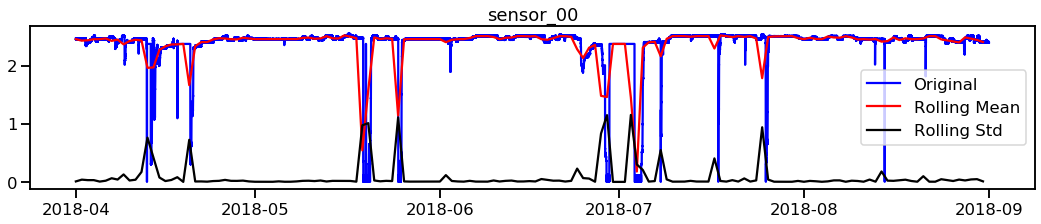

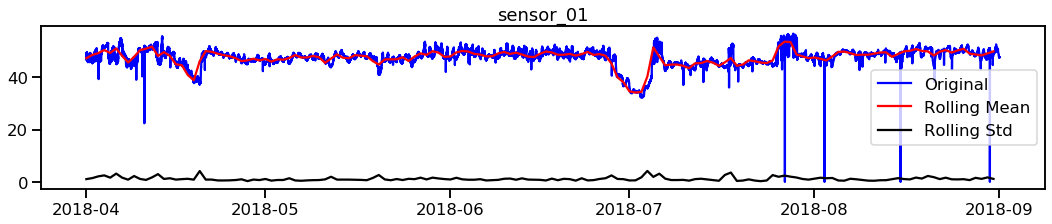

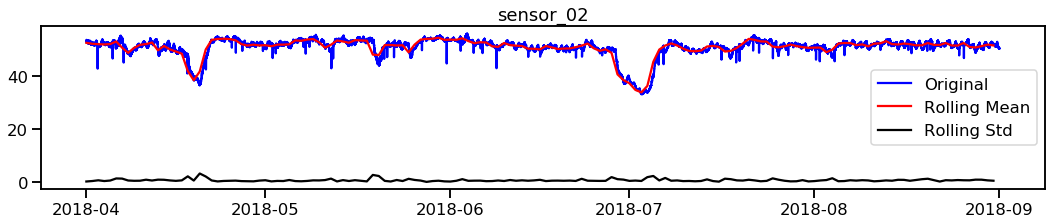

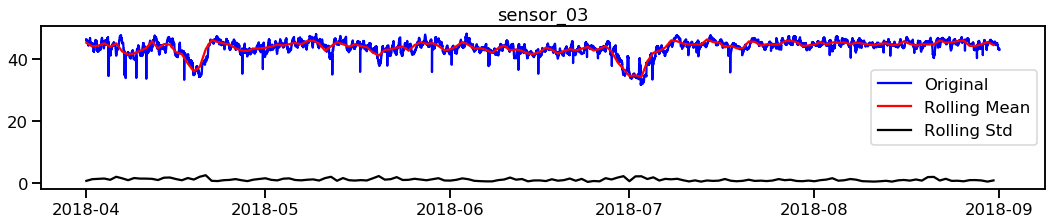

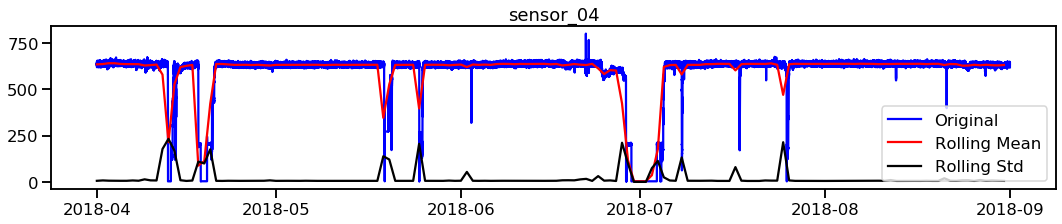

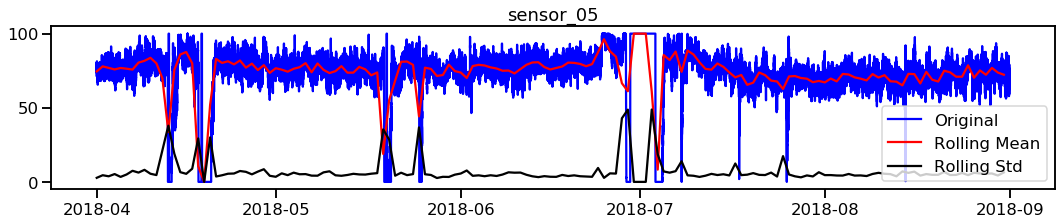

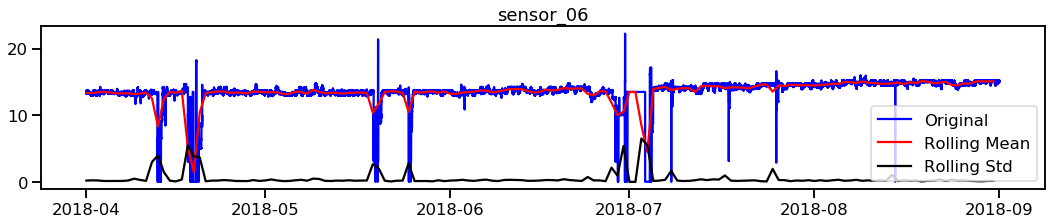

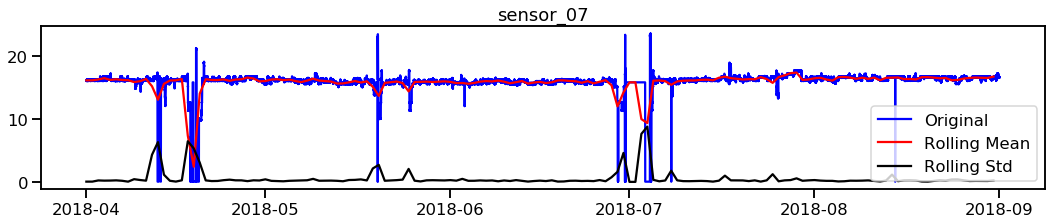

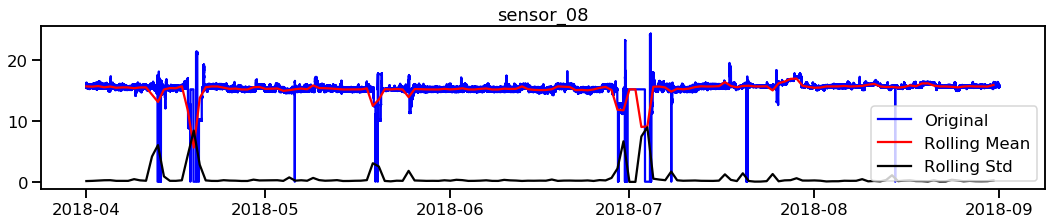

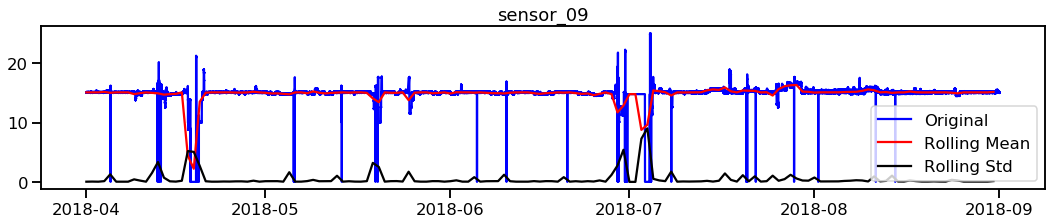

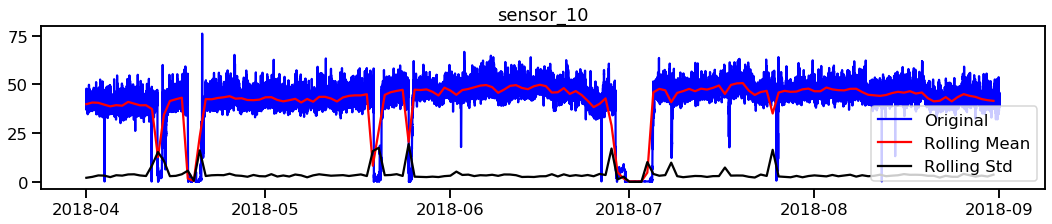

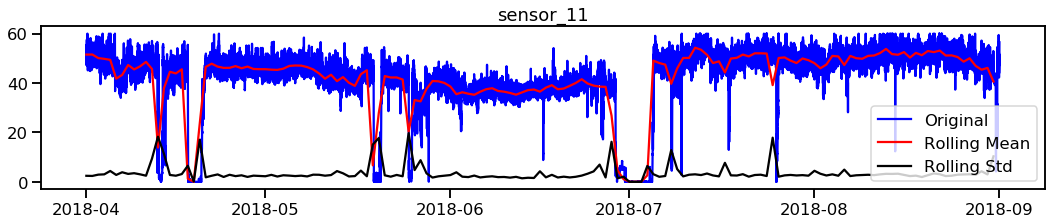

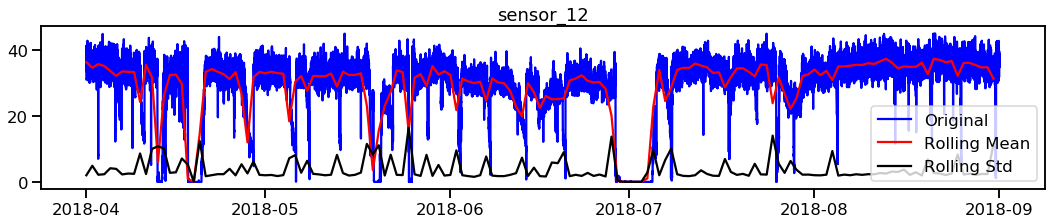

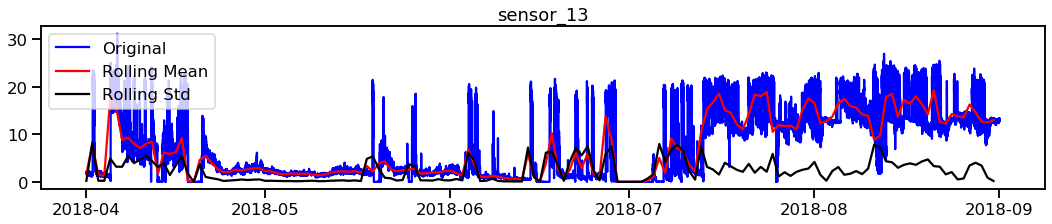

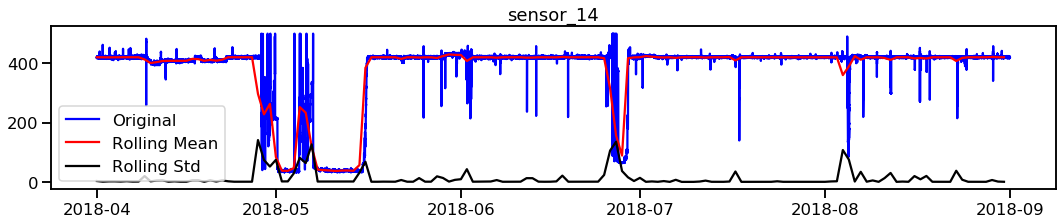

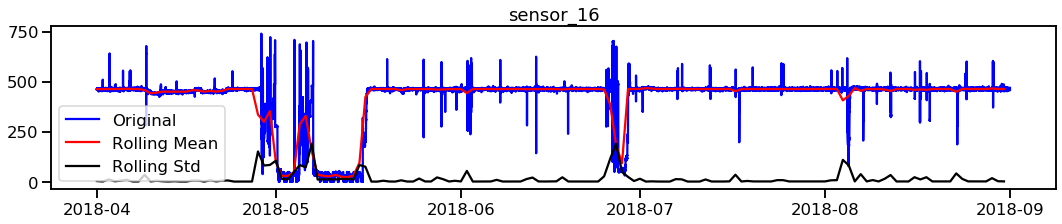

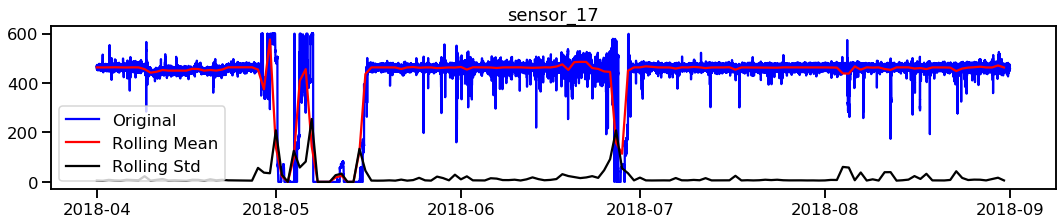

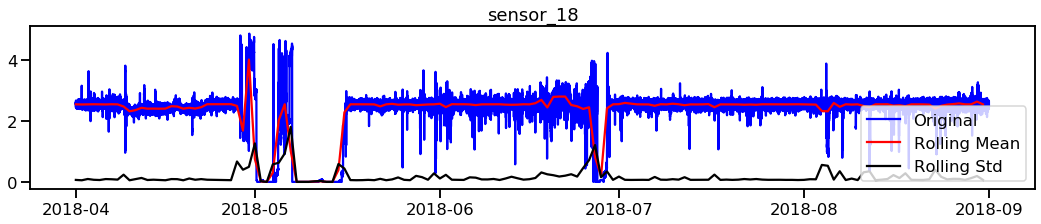

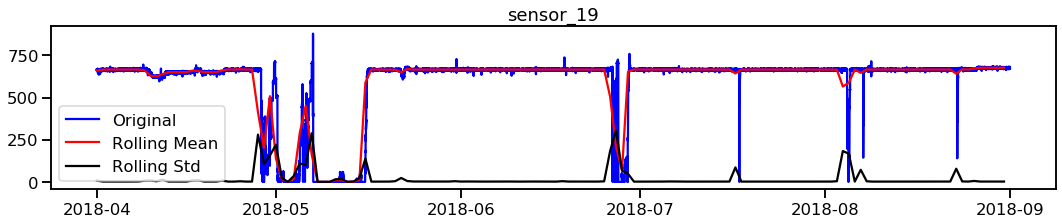

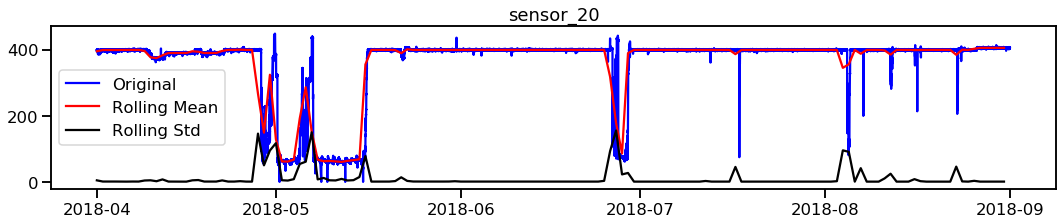

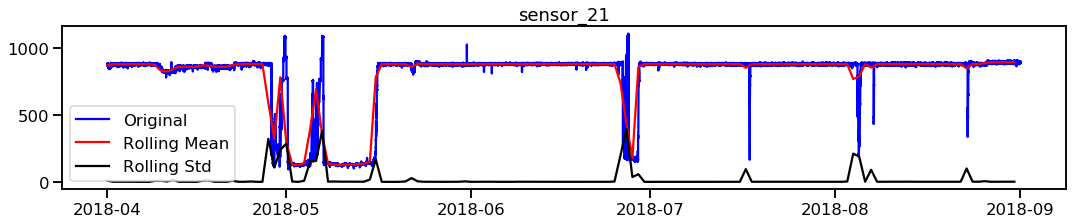

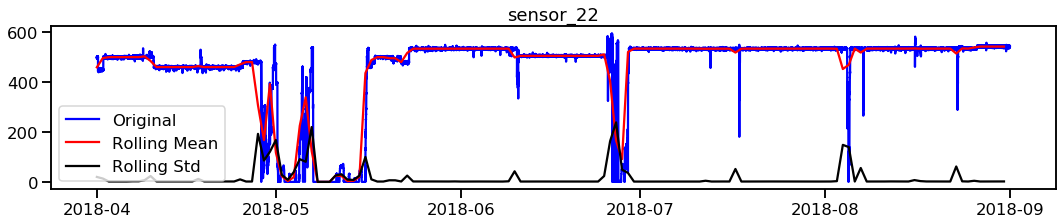

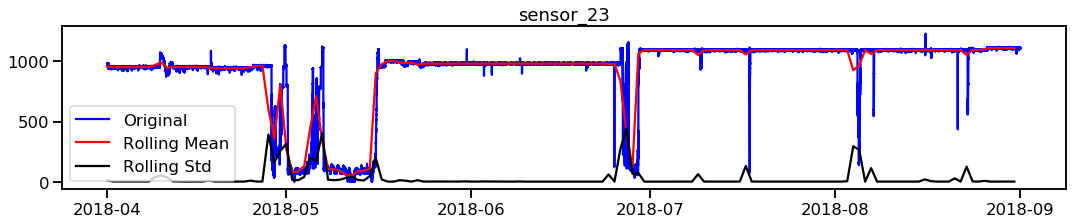

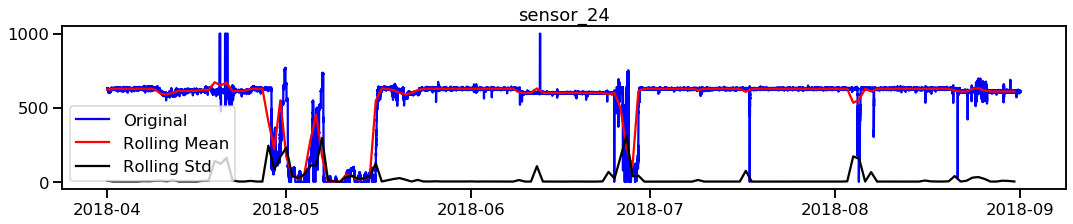

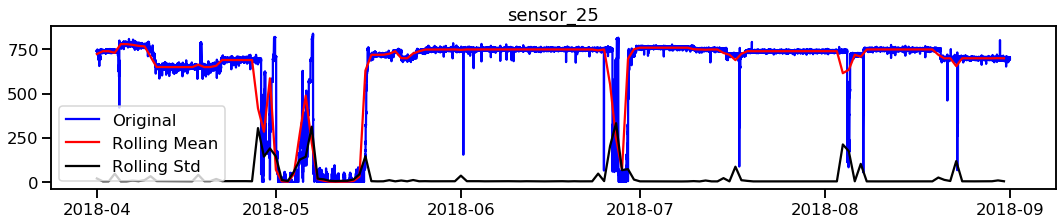

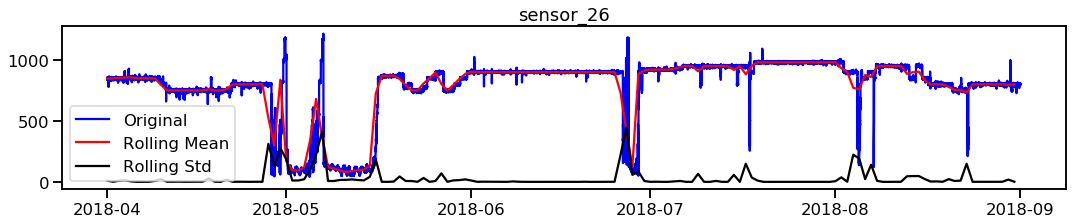

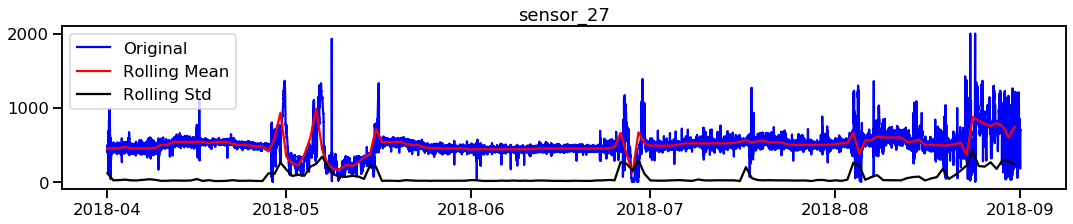

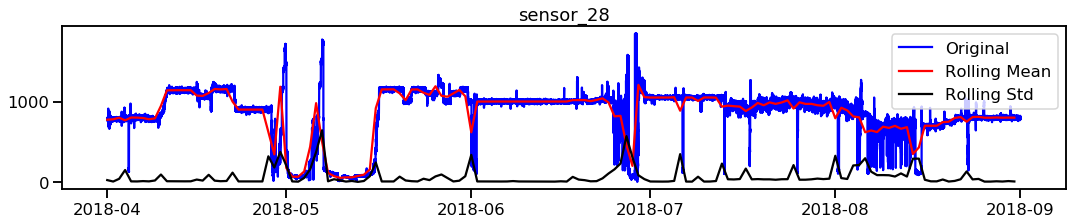

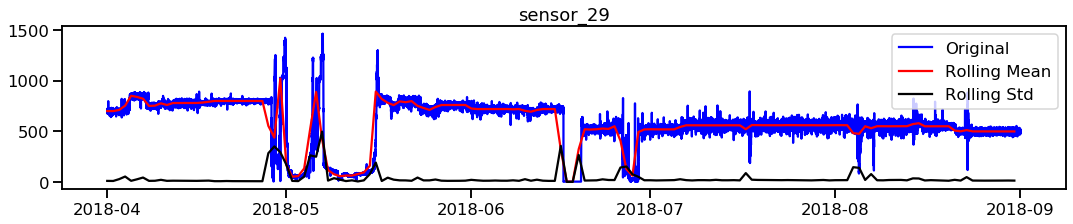

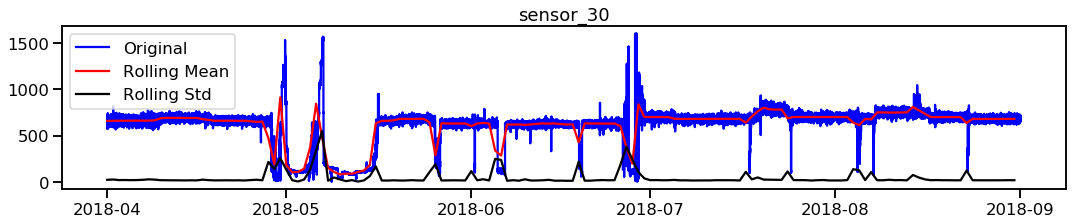

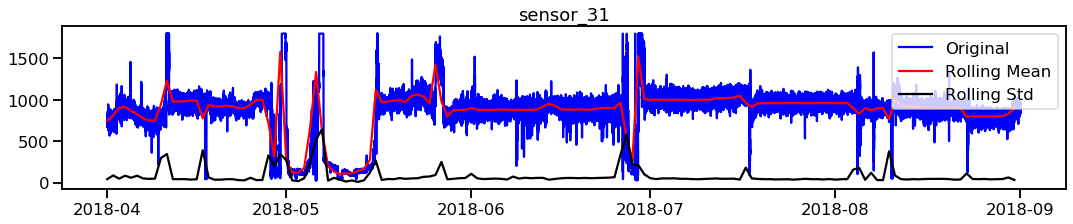

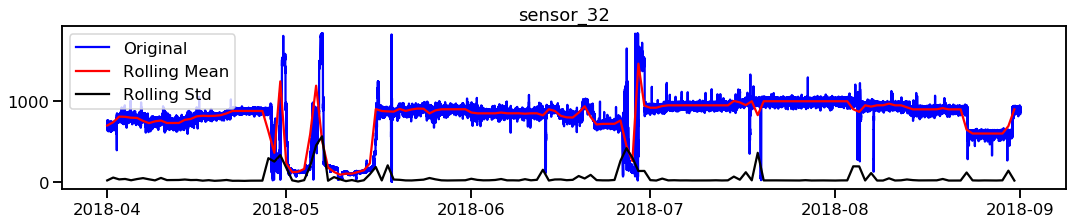

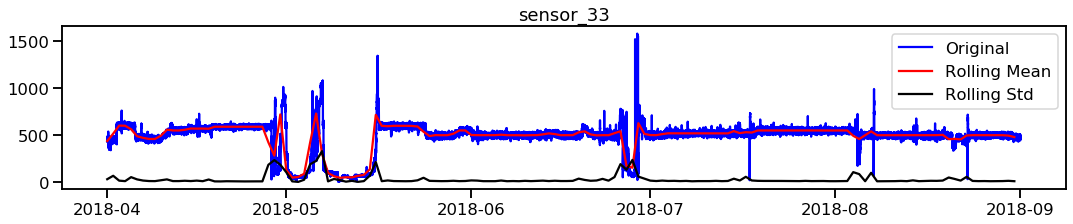

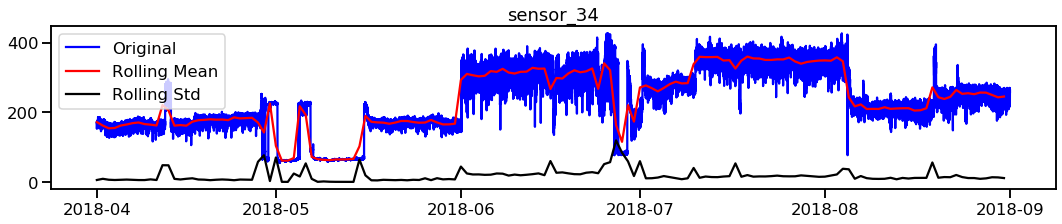

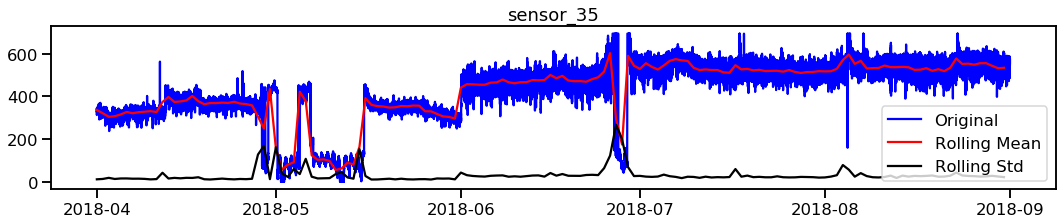

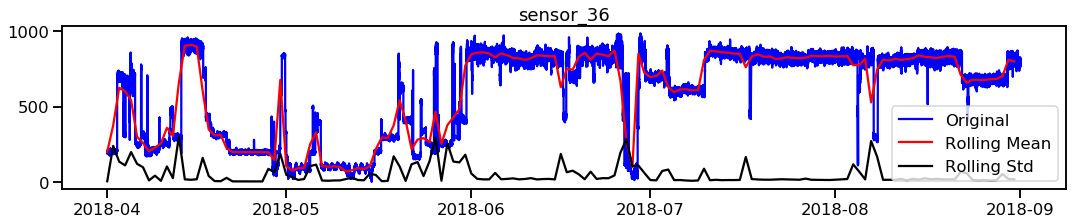

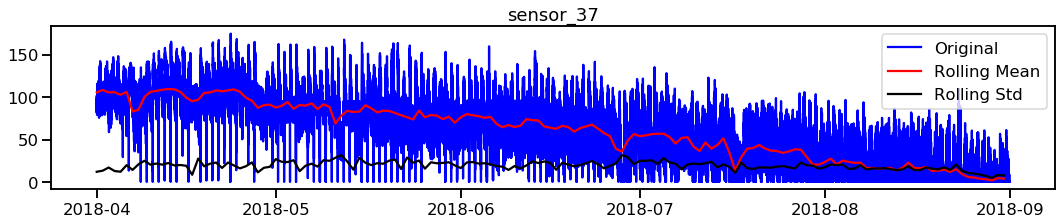

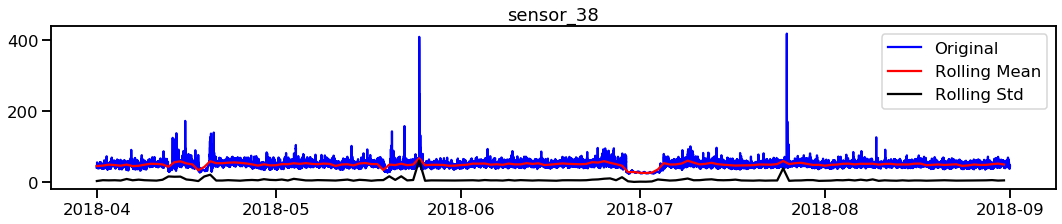

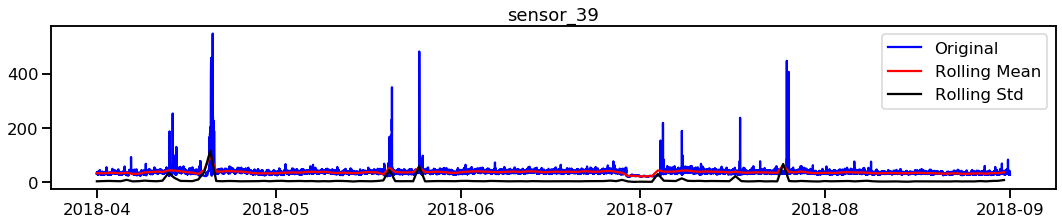

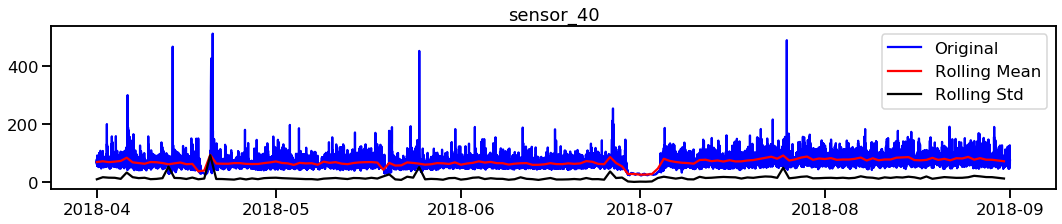

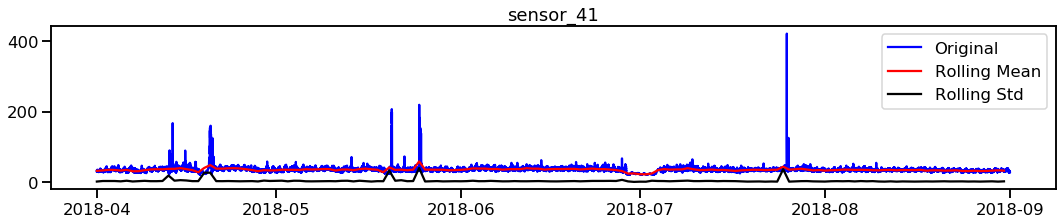

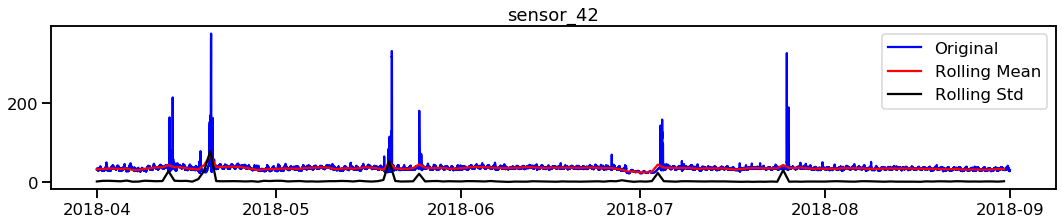

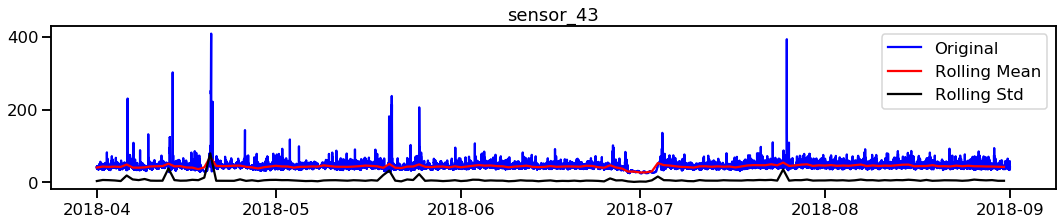

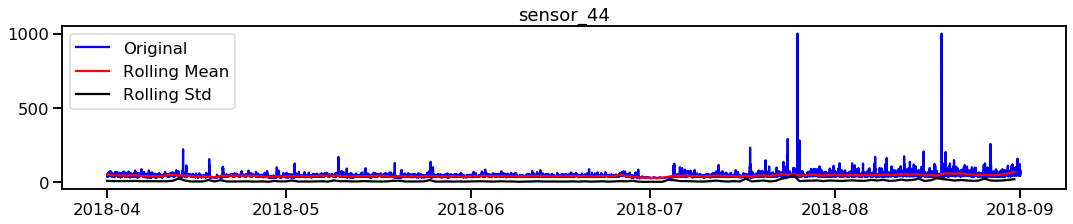

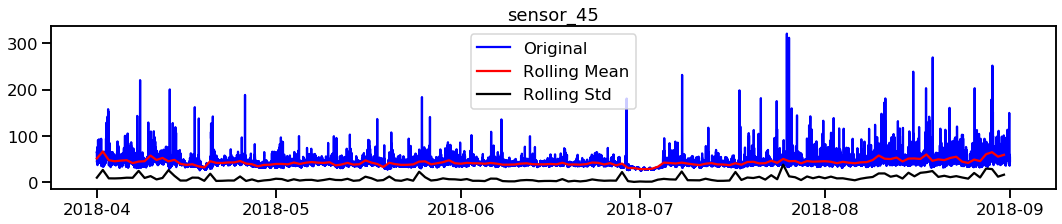

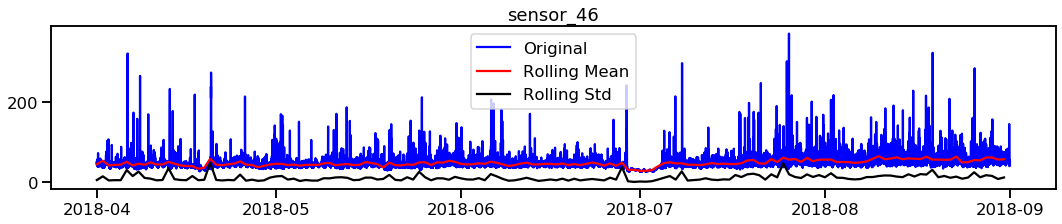

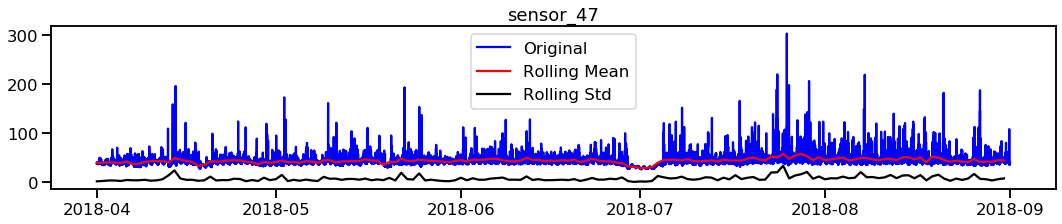

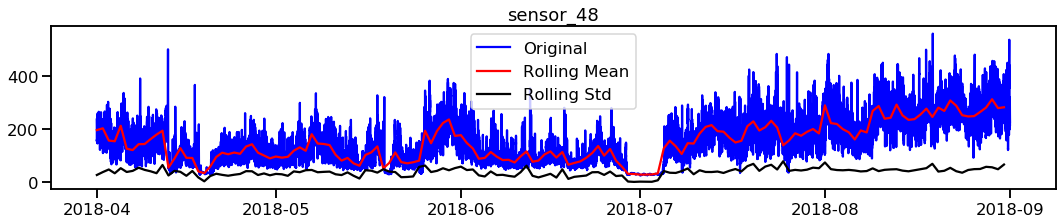

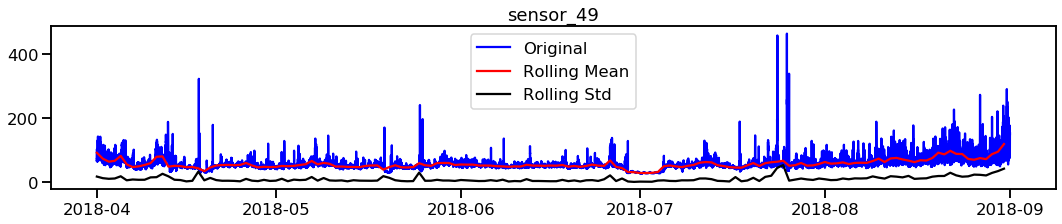

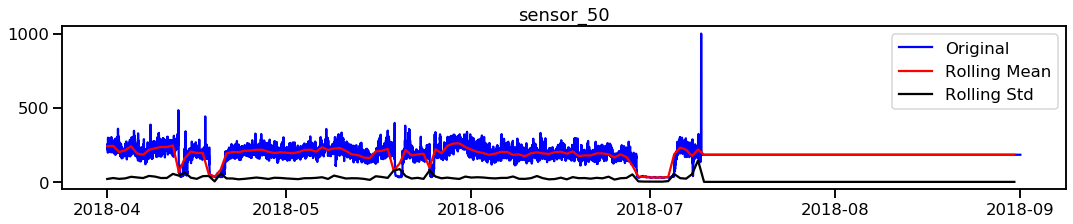

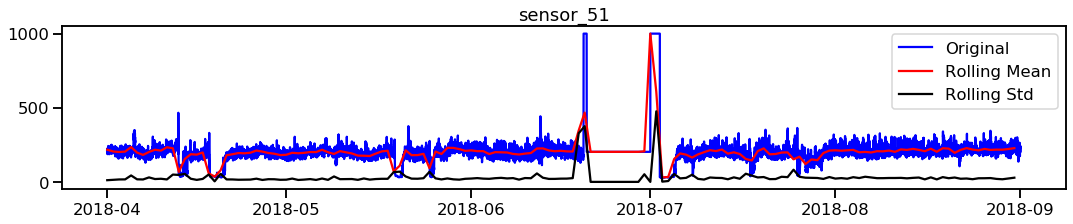

In [14]:
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df[name], color='blue', label='Original')
    _ = plt.plot(rollmean[name], color='red', label='Rolling Mean')
    _ = plt.plot(rollstd[name], color='black', label='Rolling Std' )
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

df2 = df.drop(['machine_status'], axis=1)
names=df2.columns
x = df[names]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

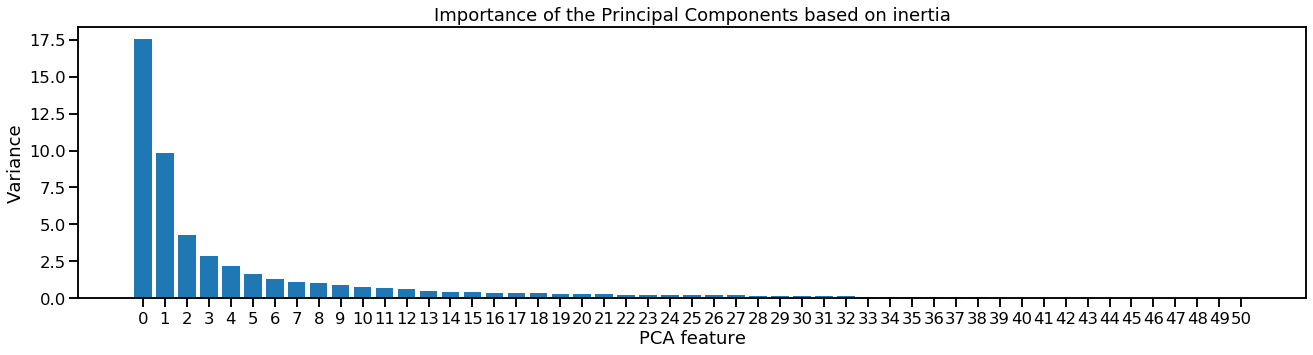

In [16]:
features = range(pca.n_components_)
_ = plt.figure(figsize=(22, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [17]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['pc1', 'pc2'])

In [18]:
df['pc1']=pd.Series(principalDf['pc1'].values, index=df.index)
df['pc2']=pd.Series(principalDf['pc2'].values, index=df.index)

In [19]:
df.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
date                                                                         
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
date                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_45  sensor_46  sensor_47  sensor_48  \
date                 ...                                               
2018-04-01 00:00:00  ...   65.68287   50.92593  38.194440   157.9861   
2018-04-01 00:01:00  ...   65.68287   50.92593  38.194440   157.9861   
2018-04-01 00:02:00  ...   65.39352   51.21528  38.194443   155.9606   
2018-04-01 00:03:00  ...   64.81481   51.21528  38.194440   155.9606   
2018-04-01 00:04:00  ...   65.10416   51.79398  38.773150   158.2755   

                     sensor_49  sensor_50  sensor_51  machine_status  \
date                                                                   
2018-04-01 00:00:00   67.70834   243.0556   201.3889          NORMAL   
2018-04-01 00:01:00   67.70834   243.0556   201.3889          NORMAL   
2018-04-01 00:02:00   67.12963   241.3194   203.7037          NORMAL   
2018-04-01 00:03:00   66.84028   240.4514   203.1250          NORMAL   
2018-04-01 00:04:00   66.55093   242.1875   201.3889          NORMAL   

                           pc1         pc2  
date                                        
2018-04-01 00:00:00  72.736850  265.819997  
2018-04-01 00:01:00  72.736850  265.819997  
2018-04-01 00:02:00  30.802311  283.470003  
2018-04-01 00:03:00  27.329130  290.144344  
2018-04-01 00:04:00  32.911764  294.766508  

[5 rows x 54 columns]

In [20]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc1'])
# Print p-value
print(result[1])

5.453684941848893e-05


In [21]:
result = adfuller(principalDf['pc2'])
# Print p-value
print(result[1])

1.8909142419835578e-06


In [22]:
# Compute change in daily mean 
pca1 = principalDf['pc1'].pct_change()
# Compute autocorrelation
autocorrelation = pca1.dropna().autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -0.002051194822323594


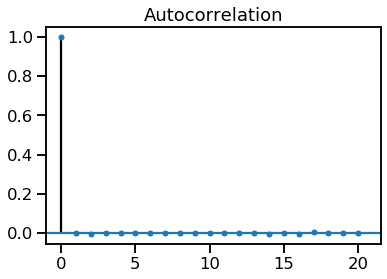

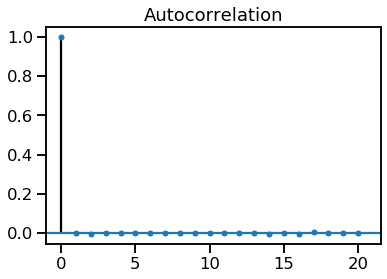

In [23]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca1.dropna(), lags=20, alpha=0.05)

In [24]:
# Compute change in daily mean 
pca2 = principalDf['pc2'].pct_change()
# Compute autocorrelation
autocorrelation = pca2.autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -3.150835090405595e-05


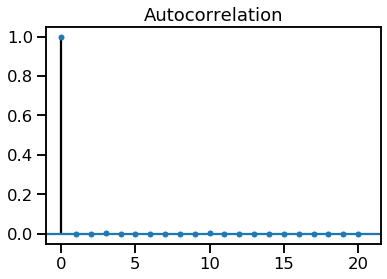

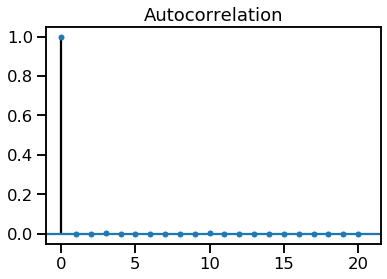

In [25]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca2.dropna(), lags=20, alpha=0.05)

In [26]:
# outlier_lower = Q1 - (1.5*IQR)
# outlier_upper = Q3 + (1.5*IQR)
# Calculate outlier bounds for pc1
q1_pc1, q3_pc1 = df['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)
# Calculate outlier bounds for pc2
q1_pc2, q3_pc2 = df['pc2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)

In [27]:
lower_pc1, upper_pc1

(-736.3329510286171, 222.73590494563246)

In [28]:
lower_pc2, upper_pc2

(-738.2364730598831, 683.9742726604616)

In [29]:
df['anomaly_pc1'] = ((df['pc1']>upper_pc1) | (df['pc1']<lower_pc1)).astype('int')
df['anomaly_pc2'] = ((df['pc2']>upper_pc2) | (df['pc2']<lower_pc2)).astype('int')

In [30]:
df['anomaly_pc1'].value_counts()

0    189644
1     29877
Name: anomaly_pc1, dtype: int64

In [31]:
df['anomaly_pc2'].value_counts()

0    217947
1      1574
Name: anomaly_pc2, dtype: int64

In [32]:
outliers_pc1 = df.loc[(df['pc1']>upper_pc1) | (df['pc1']<lower_pc1), 'pc1']
outliers_pc2 = df.loc[(df['pc2']>upper_pc2) | (df['pc2']<lower_pc2), 'pc2']

In [33]:
len(outliers_pc1)/len(df)

0.13610087417604694

In [34]:
len(outliers_pc2)/len(df)

0.0071701568414866915

In [35]:
# Apply SelectKBest class to extract the best 3 features - Univariate feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler


In [36]:
x = df.drop(['machine_status', 'pc1', 'pc2', 'anomaly_pc1', 'anomaly_pc2'], axis=1)
y = df['machine_status']


In [38]:
x.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
date                                                                         
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
date                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_42  sensor_43  sensor_44  sensor_45  \
date                 ...                                               
2018-04-01 00:00:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:01:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:02:00  ...  31.770830   41.66666  39.351852   65.39352   
2018-04-01 00:03:00  ...  31.510420   40.88541  39.062500   64.81481   
2018-04-01 00:04:00  ...  31.510420   41.40625  38.773150   65.10416   

                     sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
date                                                                         
2018-04-01 00:00:00   50.92593  38.194440   157.9861   67.70834   243.0556   
2018-04-01 00:01:00   50.92593  38.194440   157.9861   67.70834   243.0556   
2018-04-01 00:02:00   51.21528  38.194443   155.9606   67.12963   241.3194   
2018-04-01 00:03:00   51.21528  38.194440   155.9606   66.84028   240.4514   
2018-04-01 00:04:00   51.79398  38.773150   158.2755   66.55093   242.1875   

                     sensor_51  
date                            
2018-04-01 00:00:00   201.3889  
2018-04-01 00:01:00   201.3889  
2018-04-01 00:02:00   203.7037  
2018-04-01 00:03:00   203.1250  
2018-04-01 00:04:00   201.3889  

[5 rows x 51 columns]

In [40]:
y.value_counts()

NORMAL        205067
RECOVERING     14447
BROKEN             7
Name: machine_status, dtype: int64

In [41]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(x_scaled, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)


In [42]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(3, 'Score'))

      Feature         Score
11  sensor_11  10106.761967
12  sensor_12   9879.052739
4   sensor_04   8167.176442


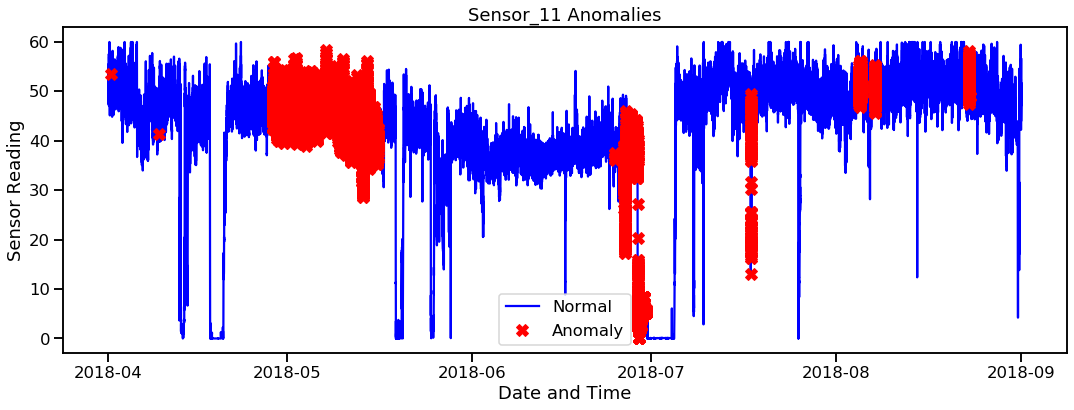

In [43]:
# Let's plot the outliers from pc1 on top of the sensor_11 see where they occured in the time series
a = df[df['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_11'], color='blue', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show()

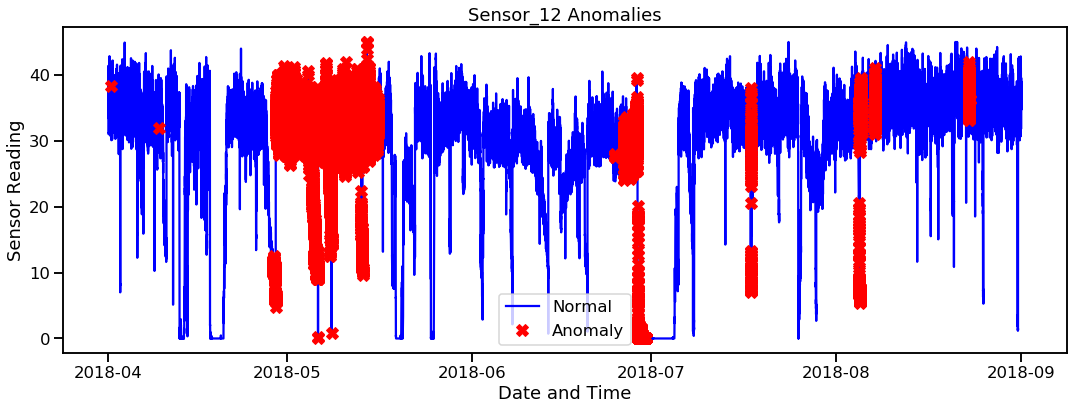

In [45]:
# Let's plot the outliers from pc2 on top of the sensor_00 see where they occured in the time series
a = df[df['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_12'], color='blue', label='Normal')
_ = plt.plot(a['sensor_12'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_12 Anomalies')
_ = plt.legend(loc='best')
plt.show();

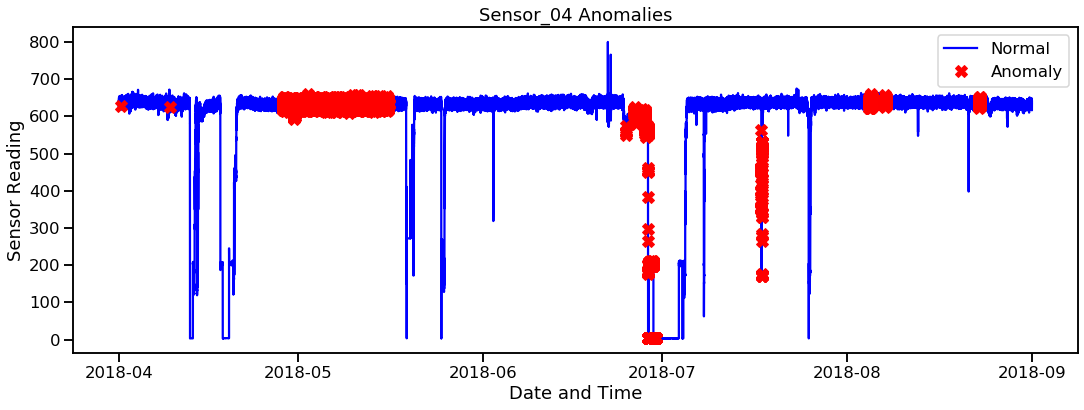

In [46]:
# Let's plot the outliers from pc2 on top of the sensor_00 see where they occured in the time series
a = df[df['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_04'], color='blue', label='Normal')
_ = plt.plot(a['sensor_04'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_04 Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [47]:
# Import necessary libraries
from sklearn.cluster import KMeans
# I will start k-means clustering with k=2 as I already know that there are 3 classes of "NORMAL" vs 
# "NOT NORMAL" which are combination of BROKEN" and"RECOVERING"
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(principalDf.values)
labels = kmeans.predict(principalDf.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))

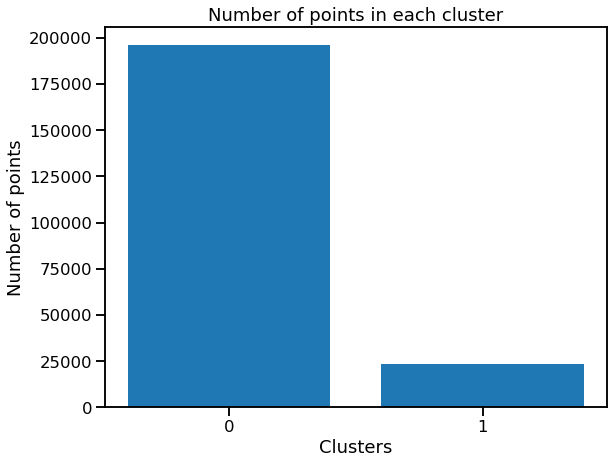

In [48]:
_ = plt.figure(figsize = (9, 7))
_ = plt.bar(clusters[0], clusters[1], tick_label=clusters[0])
_ = plt.xlabel('Clusters')
_ = plt.ylabel('Number of points')
_ = plt.title('Number of points in each cluster')
plt.show()

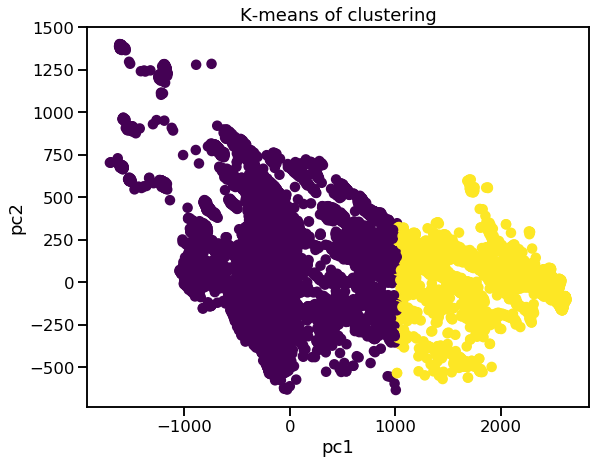

In [49]:
_ = plt.figure(figsize=(9,7))
_ = plt.scatter(principalDf['pc1'], principalDf['pc2'], c=labels)
_ = plt.xlabel('pc1')
_ = plt.ylabel('pc2')
_ = plt.title('K-means of clustering')
plt.show()

In [50]:
# Write a function that calculates distance between each point and the centroid of the closest cluster
def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [51]:
# Assume that 13% of the entire data set are anomalies 
outliers_fraction = 0.13
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(principalDf, kmeans)
# number of observations that equate to the 13% of the entire data set
number_of_outliers = int(outliers_fraction*len(distance))
# Take the minimum of the largest 13% of the distances as the threshold
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
principalDf['anomaly1'] = (distance >= threshold).astype(int)

In [52]:
principalDf.head()

pc1         pc2  anomaly1
0  72.736850  265.819997         0
1  72.736850  265.819997         0
2  30.802311  283.470003         0
3  27.329130  290.144344         0
4  32.911764  294.766508         0

In [53]:
principalDf['anomaly1'].value_counts()

0    190984
1     28537
Name: anomaly1, dtype: int64

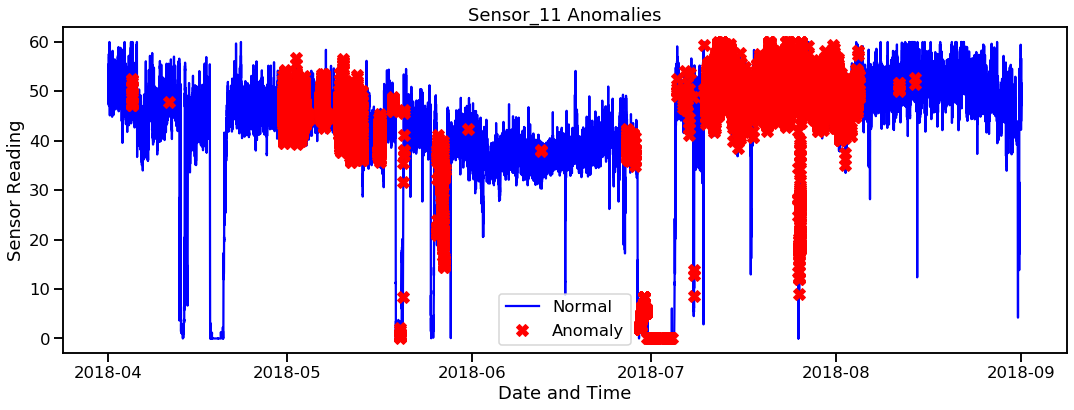

In [55]:
df['anomaly1'] = pd.Series(principalDf['anomaly1'].values, index=df.index)
a = df[df['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_11'], color='blue', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show()

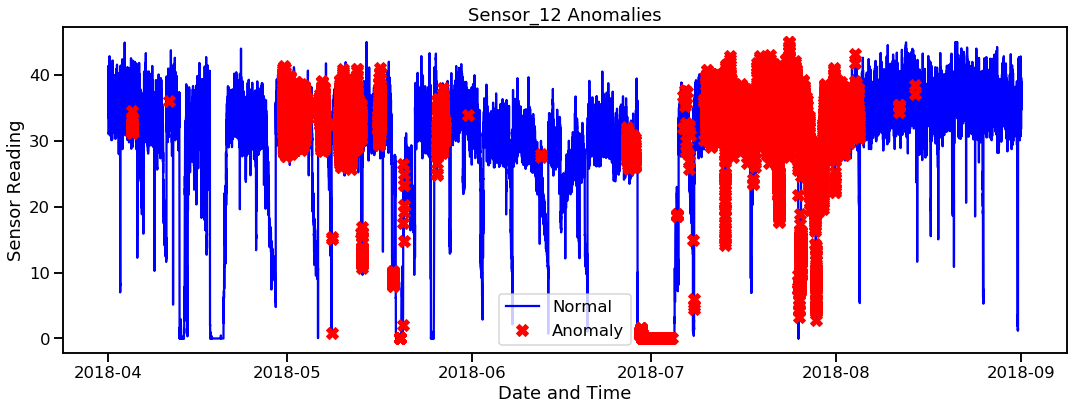

In [56]:
a = df[df['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_12'], color='blue', label='Normal')
_ = plt.plot(a['sensor_12'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_12 Anomalies')
_ = plt.legend(loc='best')
plt.show()

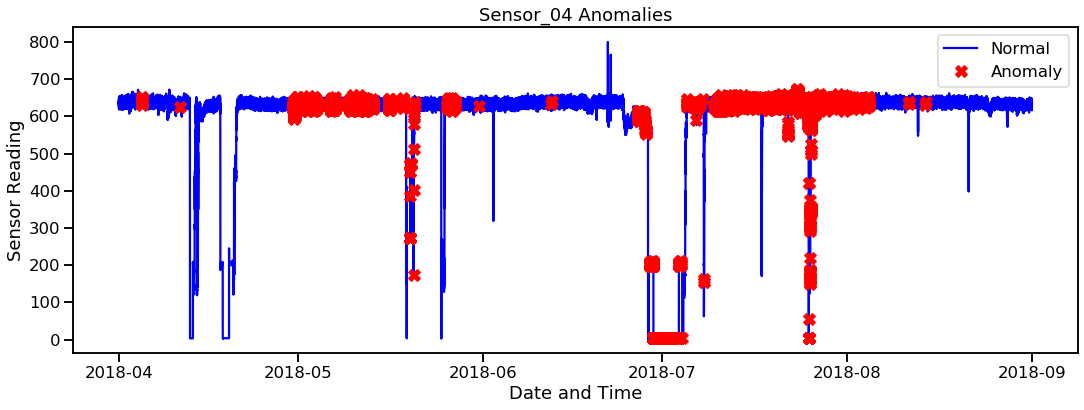

In [57]:
a = df[df['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_04'], color='blue', label='Normal')
_ = plt.plot(a['sensor_04'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_04 Anomalies')
_ = plt.legend(loc='best')
plt.show()

In [58]:
df[df['anomaly1']==1]['machine_status'].value_counts()

NORMAL        26741
RECOVERING     1795
BROKEN            1
Name: machine_status, dtype: int64

In [59]:
df['machine_status'].value_counts()

NORMAL        205067
RECOVERING     14447
BROKEN             7
Name: machine_status, dtype: int64

In [60]:
# Import IsolationForest
from sklearn.ensemble import IsolationForest
# Assume that 13% of the entire data set are anomalies 
outliers_fraction = 0.13
model =  IsolationForest(contamination=outliers_fraction)
model.fit(principalDf.values) 
principalDf['anomaly2'] = pd.Series(model.predict(principalDf.values))

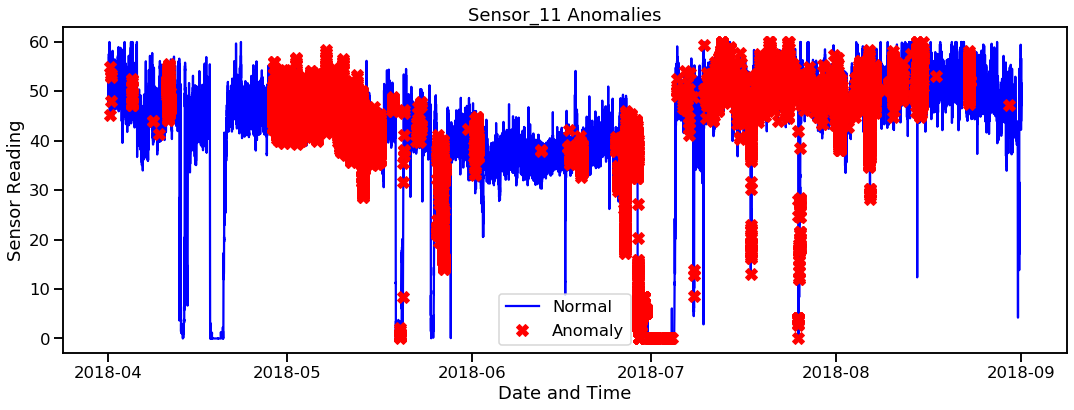

In [61]:
# visualization
df['anomaly2'] = pd.Series(principalDf['anomaly2'].values, index=df.index)
a = df.loc[df['anomaly2'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_11'], color='blue', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show()

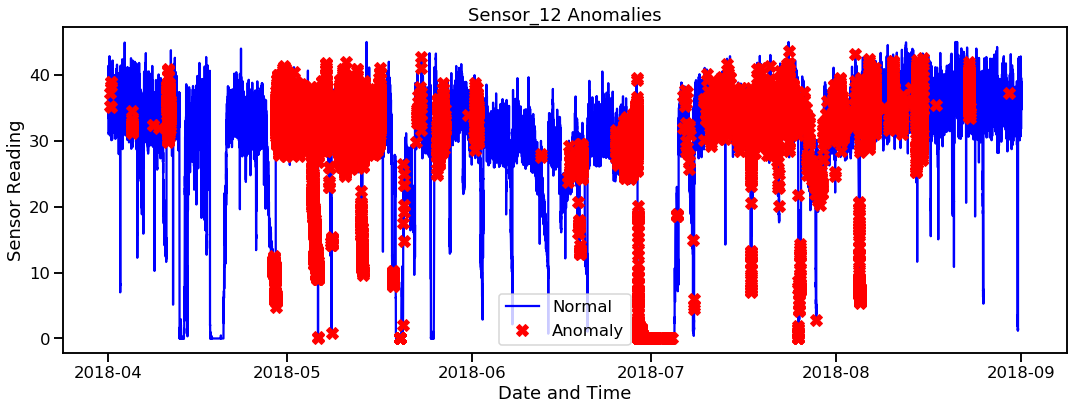

In [62]:
# visualization
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_12'], color='blue', label='Normal')
_ = plt.plot(a['sensor_12'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_12 Anomalies')
_ = plt.legend(loc='best')
plt.show()

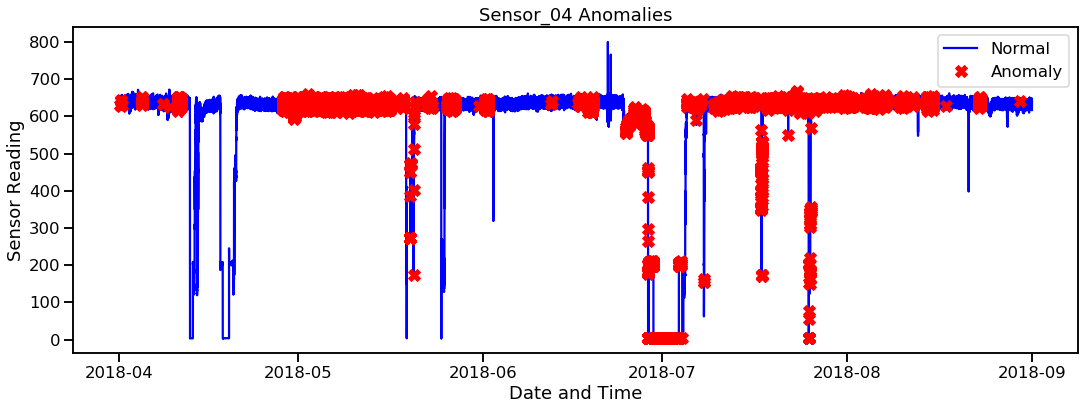

In [63]:
# visualization
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_04'], color='blue', label='Normal')
_ = plt.plot(a['sensor_04'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_04 Anomalies')
_ = plt.legend(loc='best')
plt.show()

In [64]:
df['anomaly2'].value_counts()

 1    190984
-1     28537
Name: anomaly2, dtype: int64

In [65]:
df[df['anomaly2']==1]['machine_status'].value_counts()

NORMAL        178377
RECOVERING     12601
BROKEN             6
Name: machine_status, dtype: int64

In [66]:
df['machine_status'].value_counts()

NORMAL        205067
RECOVERING     14447
BROKEN             7
Name: machine_status, dtype: int64